In [1]:
!pip install 'vanna[bigquery]' -Uqqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.0 MB/s eta 0:00:00


In [2]:
from google.colab import auth
auth.authenticate_user()

In [3]:
from google.cloud import bigquery
import vanna as vn

vn.set_api_key(vn.get_api_key('YOUR_EMAIL@gmail.com'))
vn.connect_to_bigquery(
    project_id="YOUR_PROJECT_ID"
)

Check your email for the code and enter it here: MN3SIK


In [ ]:
# vn.get_models()

## Medium Blogs dataset

Note: only you cannot access to this private dataset

In [4]:
vn.set_model("medium_blogs_titles")

Would you like to create model 'medium_blogs_titles'? (y/n): y
What type of database would you like to use? (Snowflake, BigQuery, Postgres, etc.): BigQuery


In [5]:
vn.train(ddl = """
CREATE TABLE `<MY_PROJECT_ID>.gpt3_blog.medium`
(
  title STRING,
  claps INT64
);""")

Adding ddl: 
CREATE TABLE `mlops-zoomcamp-361419.gpt3_blog.medium`
(
  title STRING,
  claps INT64
);


True

In [6]:
vn.get_training_data()

,id,training_data_type,question,content
0,5055-ddl,ddl,NaN,\nCREATE TABLE `mlops-zoomcamp-361419.gpt3_blo...


In [7]:
question = "How many blogs are in the dataset?"
vn.ask(question)

SELECT COUNT(*) AS total_blogs
FROM `mlops-zoomcamp-361419.gpt3_blog.medium`;


,total_blogs
0,71749


AI-generated follow-up questions:

* What are the titles of the blogs in the dataset?
* What is the average number of claps for the blogs?
* Which blog has the highest number of claps?
* How many blogs have more than 1000 claps?
* Can you provide a breakdown of the blogs based on the number of claps (e.g., number of blogs with 0-100 claps, 101-200 claps, etc.)?
* Are there any blogs with negative claps?
* How many unique titles are there in the dataset?
* What is the distribution of claps across the blogs (e.g., minimum, maximum, median, quartiles)?
* Is there any correlation between the length of the blog titles and the number of claps?
* How many blogs have titles that contain a specific keyword or phrase?


In [ ]:
sql = vn.generate_sql(question=question)
df = vn.run_sql(sql)
plotly_code = vn.generate_plotly_code(question=question, sql=sql, df=df)
plotly_figure = vn.get_plotly_figure(plotly_code=plotly_code, df=df)
questions = vn.generate_followup_questions(question=question, df=df)

In [ ]:
sql, df, fig, followup_questions = vn.ask(question=question, print_results=False)

In [8]:
from pprint import pprint
question = 'Can you provide a breakdown of claps by different ranges (e.g., 0-100, 100-500, 500-1000, etc.)?'
pprint(vn.get_related_training_data(question=question))

TrainingData(questions=[{'question': 'How many blogs are in the dataset?',
                         'sql': 'SELECT COUNT(*) AS total_blogs\n'
                                'FROM '
                                '`mlops-zoomcamp-361419.gpt3_blog.medium`;',
                         'tag': None}],
             ddl=['\n'
                  'CREATE TABLE `mlops-zoomcamp-361419.gpt3_blog.medium`\n'
                  '(\n'
                  '  title STRING,\n'
                  '  claps INT64\n'
                  ');'],
             documentation=[])


In [9]:
sql, df, fig, followup_questions = vn.ask(question=question, print_results=False)

In [10]:
print(sql)

WITH clap_ranges AS (
  SELECT 
    CASE 
      WHEN claps >= 0 AND claps < 100 THEN '0-100' 
      WHEN claps >= 100 AND claps < 500 THEN '100-500' 
      WHEN claps >= 500 AND claps < 1000 THEN '500-1000' 
      ELSE '1000+' 
    END AS clap_range,
    COUNT(*) AS blog_count
  FROM `mlops-zoomcamp-361419.gpt3_blog.medium`
  GROUP BY clap_range
)
SELECT clap_range, blog_count
FROM clap_ranges;


In [11]:
fig

In [13]:
pprint(followup_questions)

['What is the distribution of claps within each clap range?',
 'Can you provide the average number of claps for each clap range?',
 'Are there any outliers in the claps data?',
 'How many blogs fall into each clap range?',
 'Can you provide the maximum number of claps received by any blog?',
 'How many blogs received zero claps?',
 'Is there a correlation between the number of claps and the title of the '
 'blog?',
 'Can you provide the top 10 blogs with the highest number of claps?',
 'How many blogs have claps between 100 and 500?',
 'Are there any blogs with negative claps?']


WITH stats AS (
  SELECT 
    claps,
    PERCENTILE_CONT(claps, 0.25) OVER () AS q1,
    PERCENTILE_CONT(claps, 0.75) OVER () AS q3,
    STDDEV(claps) OVER () AS std_dev
  FROM `mlops-zoomcamp-361419.gpt3_blog.medium`
)
SELECT claps
FROM stats
WHERE claps < q1 - 1.5 * std_dev OR claps > q3 + 1.5 * std_dev;


,claps
0,6400
1,6400
2,6400
3,19200
4,4100
...,...
773,17400
774,17400
775,8700
776,15100


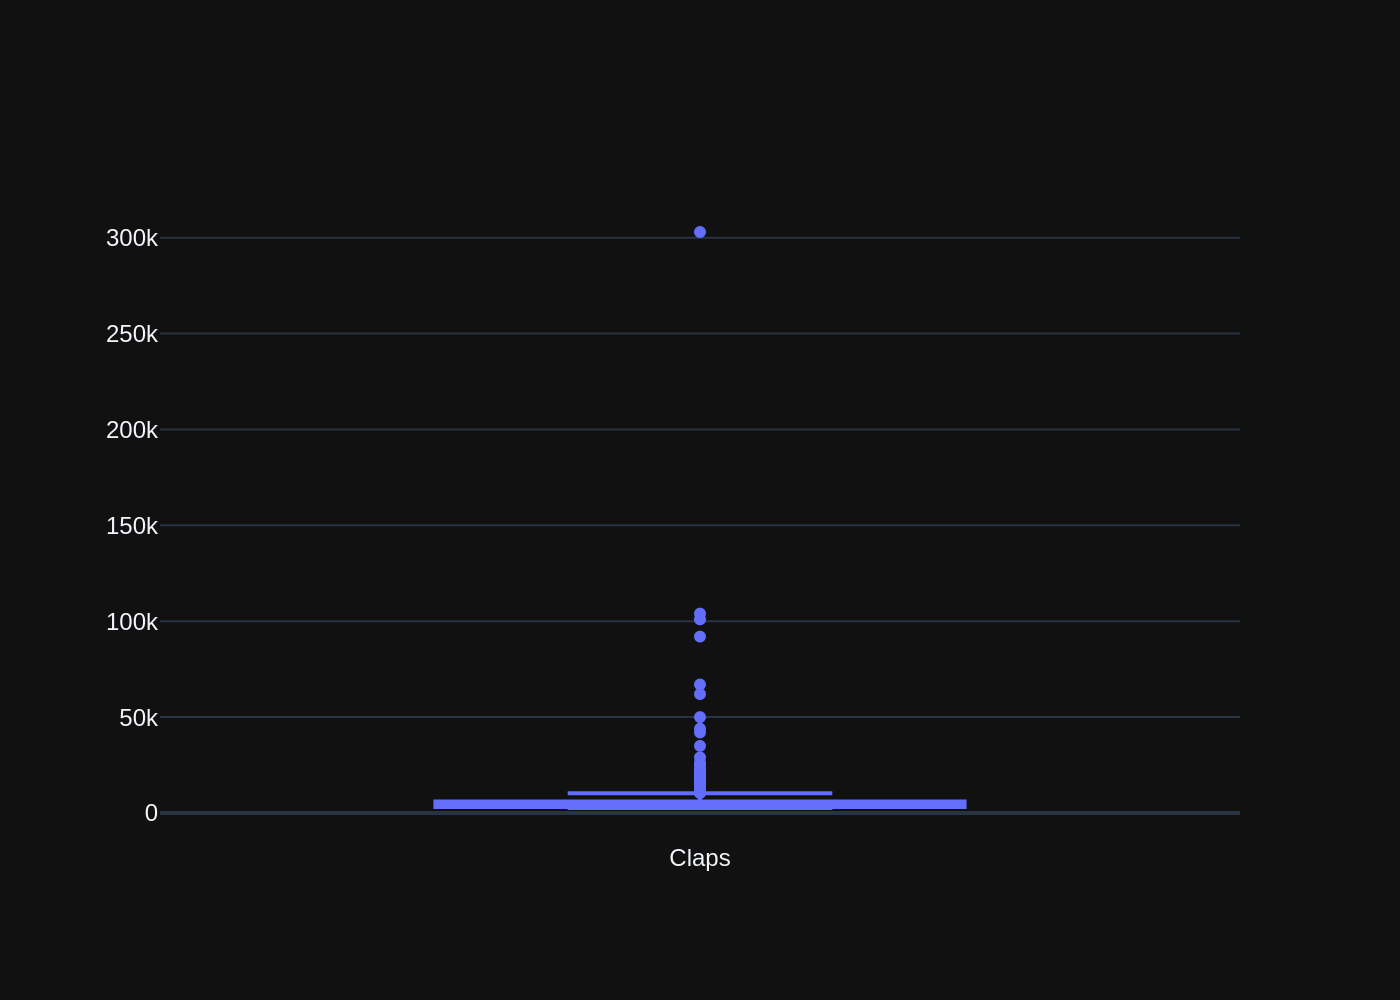

AI-generated follow-up questions:

* What is the average number of claps?
* What is the maximum number of claps?
* What is the minimum number of claps?
* What is the median number of claps?
* What is the standard deviation of claps?
* How many blogs have more than 1000 claps?
* How many blogs have zero claps?
* How many unique numbers of claps are there?
* What is the distribution of claps?
* What is the most common number of claps?
* Is the number of claps evenly distributed?


In [22]:
vn.ask("Are there any outliers in the number of claps?")

## Chicago Crime

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified. This data includes unverified reports supplied to the Police Department. The preliminary crime classifications may be changed at a later date based upon additional investigation and there is always the possibility of mechanical or human error. Therefore, the Chicago Police Department does not guarantee (either expressed or implied) the accuracy, completeness, timeliness, or correct sequencing of the information and the information should not be used for comparison purposes over time.


In [14]:
dataset = "chicago_crime_data"
vn.set_model(dataset)

Would you like to create model 'chicago_crime_data'? (y/n): y
What type of database would you like to use? (Snowflake, BigQuery, Postgres, etc.): BigQuery


In [15]:
vn.train(ddl="""
CREATE TABLE `bigquery-public-data.chicago_crime.crime`(
    unique_key INT64 NOT NULL,
    case_number STRING,
    date TIMESTAMP,
    block STRING,
    iucr STRING,
    primary_type STRING,
    description STRING,
    location_description STRING,
    arrest BOOL,
    domestic BOOL,
    beat INT64,
    district INT64,
    ward INT64,
    community_area INT64,
    fbi_code STRING,
    x_coordinate FLOAT64,
    y_coordinate FLOAT64,
    year INT64,
    updated_on TIMESTAMP,
    latitude FLOAT64,
    longitude FLOAT64,
    location STRING
    )
OPTIONS(
    description="Chicago Crime dataset"
);
"""
)

Adding ddl: 
CREATE TABLE `bigquery-public-data.chicago_crime.crime`(
    unique_key INT64 NOT NULL,
    case_number STRING,
    date TIMESTAMP,
    block STRING,
    iucr STRING,
    primary_type STRING,
    description STRING,
    location_description STRING,
    arrest BOOL,
    domestic BOOL,
    beat INT64,
    district INT64,
    ward INT64,
    community_area INT64,
    fbi_code STRING,
    x_coordinate FLOAT64,
    y_coordinate FLOAT64,
    year INT64,
    updated_on TIMESTAMP,
    latitude FLOAT64,
    longitude FLOAT64,
    location STRING
    )
OPTIONS(
    description="Chicago Crime dataset"
);



True

In [16]:
vn.get_training_data()

,id,training_data_type,question,content
0,5056-ddl,ddl,NaN,\nCREATE TABLE `bigquery-public-data.chicago_c...


In [17]:
vn.generate_questions()

['How many unique crimes are in the dataset?',
 'What is the most common crime type?',
 'What is the least common crime type?',
 'How many crimes were committed in a specific year?',
 'How many arrests were made for a specific crime type?',
 'What is the average latitude and longitude of the crime locations?',
 'How many domestic crimes were there?',
 'What is the most common location description for a crime?',
 'How many crimes were committed in each community area?',
 'What is the average x and y coordinate of the crime locations?']

In [18]:
vn.ask("How many unique crime cases are in the dataset?")

SELECT COUNT(DISTINCT case_number)
FROM `bigquery-public-data.chicago_crime.crime`;


,f0_
0,7897912


AI-generated follow-up questions:

* What is the most common type of crime in the dataset?
* How many crimes were reported in each year?
* What is the distribution of crimes across different locations?
* How many arrests were made for each type of crime?
* What is the trend in crime rates over the years?
* Which community area has the highest crime rate?
* What is the average number of crimes reported per month?
* What are the top 10 most frequent crime descriptions?
* What is the most common location for domestic crimes?
* How many crimes involve firearms?
* How many crimes were reported in each district?
* What is the average number of crimes reported per day of the week?
* What is the average age of offenders?
* How many crimes were reported during daytime versus nighttime?
* What is the distribution of crimes across different wards?
* Is there any correlation between the type of crime and the location description?
* How many crimes involved juvenile offenders?
* What is the average response time for reported crimes?
* Are there any seasonal patterns in the number of reported crimes?
* How many crimes were reported on holidays?


In [19]:
vn.ask("Which block has the highest number of reported crimes?")

SELECT block, COUNT(*) AS num_crimes
FROM `bigquery-public-data.chicago_crime.crime`
GROUP BY block
ORDER BY num_crimes DESC
LIMIT 1;


,block,num_crimes
0,100XX W OHARE ST,16574


AI-generated follow-up questions:

* What is the total number of reported crimes in Chicago?
* How many different types of crimes are there in Chicago?
* Which primary type of crime has the highest number of reported incidents?
* What is the most common location description for reported crimes?
* What is the average number of crimes reported per year?
* Which year had the highest number of reported crimes?
* What is the distribution of reported crimes across different community areas?
* How many reported crimes resulted in an arrest?
* What is the percentage of reported domestic crimes?
* What is the distribution of reported crimes across different districts?
* What is the distribution of reported crimes across different beats?
* What are the top 10 blocks with the highest number of reported crimes?
* What is the most common FBI code for reported crimes?
* What is the trend of reported crimes over the years?
* How does the number of reported crimes vary by month or season?


In [20]:
vn.ask("What is the yearly trend of the total number of crimes?")

SELECT year, COUNT(*) AS num_crimes
FROM `bigquery-public-data.chicago_crime.crime`
GROUP BY year
ORDER BY year;


,year,num_crimes
0,2001,485888
1,2002,486807
2,2003,475985
3,2004,469423
4,2005,453774
5,2006,448178
6,2007,437090
7,2008,427184
8,2009,392827
9,2010,370517


AI-generated follow-up questions:

* What is the monthly trend of the total number of crimes?
* What are the most common types of crimes?
* What are the most common locations for crimes?
* Which year had the highest number of crimes?
* What is the trend of arrests over the years?
* What is the trend of domestic crimes over the years?
* What is the trend of crimes by location over the years?
* What is the trend of crimes by district over the years?
* What is the trend of crimes by ward over the years?
* What is the trend of crimes by community area over the years?
* What is the trend of crimes by FBI code over the years?
* What is the trend of crimes by beat over the years?
* What is the trend of crimes by latitude and longitude over the years?
* What is the trend of crimes during different times of the day?


In [21]:
vn.ask("Are there any seasonal patterns in the number of crimes?")

SELECT EXTRACT(MONTH FROM date) AS month, COUNT(*) AS num_crimes
FROM `bigquery-public-data.chicago_crime.crime`
GROUP BY month
ORDER BY month;


,month,num_crimes
0,1,622275
1,2,547724
2,3,650313
3,4,647789
4,5,704983
5,6,704175
6,7,740912
7,8,734075
8,9,681145
9,10,676291


AI-generated follow-up questions:

* What is the total number of crimes in Chicago?
* How does the number of crimes vary by month?
* Are there any specific types of crimes that occur more frequently?
* What is the most common location for crimes to occur?
* Is there a correlation between arrests and specific types of crimes?
* Are there any specific blocks in Chicago with a high number of crimes?
* How does the number of crimes vary by year?
* Are there any seasonal patterns in the number of arrests?
* What is the distribution of crimes across different community areas in Chicago?
* Are there any specific days of the week with a higher number of crimes?


In [45]:
vn.ask("What are the crimes commited most frequently, in each district")

SELECT district, primary_type, COUNT(*) AS num_crimes
FROM `bigquery-public-data.chicago_crime.crime`
WHERE district IS NOT NULL
GROUP BY district, primary_type
ORDER BY district, num_crimes DESC;


,district,primary_type,num_crimes
0,1,THEFT,138758
1,1,BATTERY,33996
2,1,DECEPTIVE PRACTICE,31495
3,1,CRIMINAL TRESPASS,22091
4,1,CRIMINAL DAMAGE,18442
...,...,...,...
750,31,ARSON,2
751,31,KIDNAPPING,1
752,31,PUBLIC PEACE VIOLATION,1
753,31,STALKING,1


AI-generated follow-up questions:

* What are the least frequently committed crimes in each district?
* Can you provide a breakdown of crimes by location description?
* What are the most common crimes in each ward?
* How do the crime rates vary by community area?
* Can you show the trend of crime rates over the years?
* What are the top 10 crimes committed overall in Chicago?
* Which month has the highest number of crimes reported?
* Are there any specific types of crimes that have seen a significant increase or decrease in recent years?
* Can you provide a list of crimes that have the highest arrest rates?
* Are there any patterns in the relationship between domestic incidents and different crime types?


In [44]:
vn.ask("In every district, what crime is the most common? Return me a table with every district and its most common crime")

WITH crime_counts AS (
    SELECT district, primary_type, COUNT(*) AS num_crimes
    FROM `bigquery-public-data.chicago_crime.crime`
    WHERE district IS NOT NULL
    GROUP BY district, primary_type
), ranked_crimes AS (
    SELECT district, primary_type, num_crimes,
    ROW_NUMBER() OVER (PARTITION BY district ORDER BY num_crimes DESC) AS rank
    FROM crime_counts
)
SELECT district, primary_type
FROM ranked_crimes
WHERE rank = 1
ORDER BY district;


,district,primary_type
0,1,THEFT
1,2,BATTERY
2,3,BATTERY
3,4,BATTERY
4,5,BATTERY
5,6,BATTERY
6,7,BATTERY
7,8,THEFT
8,9,BATTERY
9,10,BATTERY


AI-generated follow-up questions:

* What is the least common crime in each district?
* What is the overall trend of crime in Chicago over the years?
* Which month has the highest number of crimes?
* What is the most common crime in each community area?
* What is the most common crime in each ward?
* What is the most common crime in each beat?
* What is the most common crime in each location description?
* What is the percentage of crimes that result in an arrest?
* What is the percentage of domestic crimes?
* Which district has the highest number of crimes?
* Which district has the lowest number of crimes?
* Which community area has the highest number of crimes?
* Which community area has the lowest number of crimes?
* Which ward has the highest number of crimes?
* Which ward has the lowest number of crimes?
* Which beat has the highest number of crimes?
* Which beat has the lowest number of crimes?
* Which location description is associated with the highest number of crimes?
* Which location description is associated with the lowest number of crimes?



## Austin Bikeshare

In [46]:
dataset = "austin_bikeshare"
vn.set_model(dataset)

Would you like to create model 'austin_bikeshare'? (y/n): y
What type of database would you like to use? (Snowflake, BigQuery, Postgres, etc.): BigQuery


In [47]:
vn.train(ddl="""
CREATE TABLE `bigquery-public-data.austin_bikeshare.bikeshare_stations`
(
  station_id INT64,
  name STRING,
  status STRING,
  address STRING,
  alternate_name STRING,
  city_asset_number INT64,
  property_type STRING,
  number_of_docks INT64,
  power_type STRING,
  footprint_length INT64,
  footprint_width FLOAT64,
  notes STRING,
  council_district INT64,
  modified_date TIMESTAMP
)
OPTIONS(
  description=""Austin Bikeshare Stations table""
);""")

vn.train(ddl="""
CREATE TABLE `bigquery-public-data.austin_bikeshare.bikeshare_trips`
(
  trip_id STRING OPTIONS(description=""Numeric ID of bike trip""),
  subscriber_type STRING OPTIONS(description=""Type of the Subscriber""),
  bike_id STRING OPTIONS(description=""ID of bike used""),
  bike_type STRING OPTIONS(description=""Type of bike used""),
  start_time TIMESTAMP OPTIONS(description=""Start timestamp of trip""),
  start_station_id INT64 OPTIONS(description=""Numeric reference for start station""),
  start_station_name STRING OPTIONS(description=""Station name for start station""),
  end_station_id STRING OPTIONS(description=""Numeric reference for end station""),
  end_station_name STRING OPTIONS(description=""Station name for end station""),
  duration_minutes INT64 OPTIONS(description=""Time of trip in minutes"")
);""")

Adding ddl: 
CREATE TABLE `bigquery-public-data.austin_bikeshare.bikeshare_stations`
(
  station_id INT64,
  name STRING,
  status STRING,
  address STRING,
  alternate_name STRING,
  city_asset_number INT64,
  property_type STRING,
  number_of_docks INT64,
  power_type STRING,
  footprint_length INT64,
  footprint_width FLOAT64,
  notes STRING,
  council_district INT64,
  modified_date TIMESTAMP
)
OPTIONS(
  description=""Austin Bikeshare Stations table""
);
Adding ddl: 
CREATE TABLE `bigquery-public-data.austin_bikeshare.bikeshare_trips`
(
  trip_id STRING OPTIONS(description=""Numeric ID of bike trip""),
  subscriber_type STRING OPTIONS(description=""Type of the Subscriber""),
  bike_id STRING OPTIONS(description=""ID of bike used""),
  bike_type STRING OPTIONS(description=""Type of bike used""),
  start_time TIMESTAMP OPTIONS(description=""Start timestamp of trip""),
  start_station_id INT64 OPTIONS(description=""Numeric reference for start station""),
  start_station_name STRING O

True

In [48]:
vn.generate_questions()

['How many stations are there in the bikeshare_stations table?',
 'What is the name of the station with station_id = 1?',
 'How many docks are there at the station with the most number of docks?',
 'How many trips were made by subscribers?',
 'What is the average duration of trips in minutes?',
 'What is the maximum duration of a trip in minutes?',
 'How many trips were made with each type of bike?',
 'How many trips started at each station?',
 'How many trips ended at each station?',
 'What is the most recent modified date in the bikeshare_stations table?']

In [51]:
vn.ask("What is the total duration of trips starting from each power_type of station for 2022?")

SELECT bss.power_type, SUM(bt.duration_minutes) AS total_duration
FROM `bigquery-public-data.austin_bikeshare.bikeshare_trips` AS bt
JOIN `bigquery-public-data.austin_bikeshare.bikeshare_stations` AS bss
ON bt.start_station_id = bss.station_id
WHERE EXTRACT(YEAR FROM bt.start_time) = 2022
GROUP BY bss.power_type;


,power_type,total_duration
0,solar,6704781
1,non-metered,426447


AI-generated follow-up questions:

* What is the average duration of trips for each power_type of station for 2022?
* How many trips were taken from each power_type of station for 2022?
* What is the average duration of trips for each power_type of station overall?
* What is the total duration of trips for each year?
* What is the total duration of trips for each station?
* What is the most popular power_type of station for trips in 2022?
* What is the least popular power_type of station for trips in 2022?
* What is the average duration of trips for each station?
* What is the average duration of trips for each year and power_type of station?
* What is the total duration of trips for each year and power_type of station?


In [50]:
vn.ask("What is the average footprint_width of starting stations of trips occurring on '2021-01-01'")

SELECT AVG(bs.footprint_width) AS average_footprint_width
FROM `bigquery-public-data.austin_bikeshare.bikeshare_trips` AS bt
JOIN `bigquery-public-data.austin_bikeshare.bikeshare_stations` AS bs
ON bt.start_station_id = bs.station_id
WHERE DATE(bt.start_time) = '2021-01-01';


,average_footprint_width
0,5.290249


AI-generated follow-up questions:

* What is the average footprint_width of ending stations of trips occurring on '2021-01-01'?
* What is the total duration of trips for each power_type in a specific year?
* What is the average number of docks at each station?
* What is the distribution of trip durations?
* What is the most common subscriber type?
* Which station has the highest number of trips starting from it?
* What is the average duration of trips starting from each station?
* What is the distribution of trip durations for each bike type?
* What is the distribution of trip durations by month?
* What is the average duration of trips for each council district?
* What is the average footprint length of starting stations of trips occurring on a specific date?


SELECT start_station_name, power_type, COUNT(*) AS trip_count
FROM `bigquery-public-data.austin_bikeshare.bikeshare_trips` AS trips
JOIN `bigquery-public-data.austin_bikeshare.bikeshare_stations` AS stations
ON trips.start_station_id = stations.station_id
WHERE EXTRACT(MONTH FROM start_time) = 7
GROUP BY start_station_name, power_type
ORDER BY power_type, trip_count DESC;


,start_station_name,power_type,trip_count
0,Lavaca & 6th,None,529
1,5th & San Marcos,None,515
2,Toomey Rd @ South Lamar,None,430
3,Bullock Museum @ Congress & MLK,None,395
4,ACC - West & 12th Street,None,381
...,...,...,...
153,13th/San Antonio,solar,76
154,11th/Salina,solar,67
155,Lake Austin Blvd @ Deep Eddy,solar,64
156,Lake Austin & Enfield,solar,37


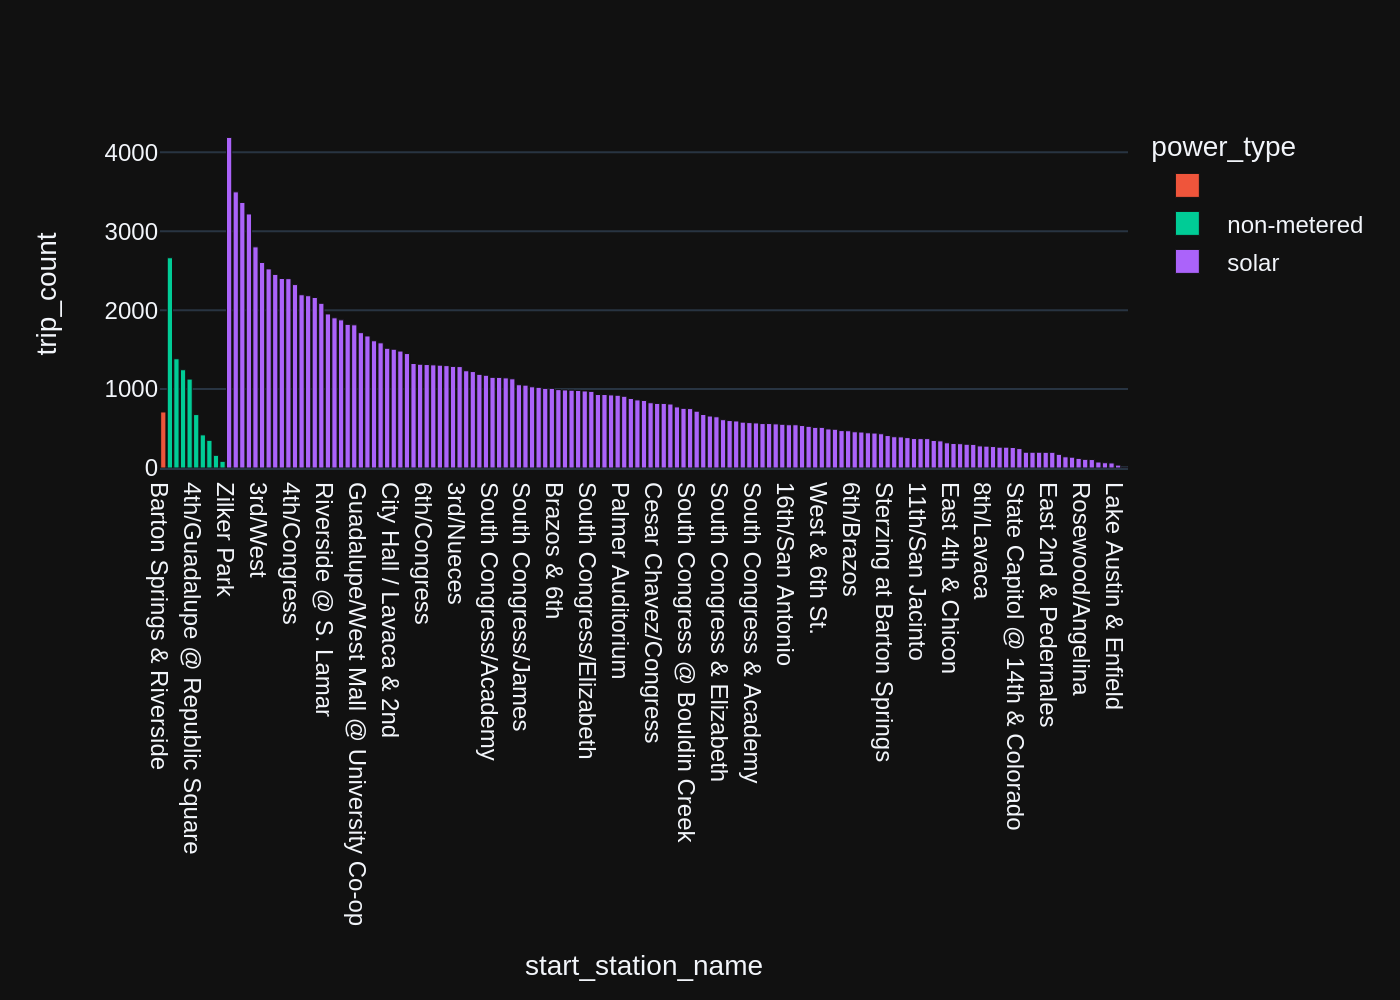

AI-generated follow-up questions:

* What is the average trip duration for each power type?
* What is the total trip duration for each power type in a specific year?
* What is the station with the highest number of bike trips?
* What is the count of bike trips per station and subscriber type?
* What is the average footprint width of stations used on January 1, 2021?
* What is the total number of bike trips per power type in a specific month?
* What is the count of bike trips per station and power type on a specific date?
* What is the count of bike trips per station and power type in a specific city?
* What is the count of bike trips per station and power type for a specific council district?
* What is the count of bike trips per station and power type for a specific property type?


In [57]:
vn.ask("What is the count of bike trips per station (name) sorted by stations' power_type for a particular month.")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a605a3e6-1564-47b2-94e7-842290ba7692' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>